In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [3]:
catsd = '/home/stephenportillo/gen_model_hack/greycats_32/'
N = 15747

In [4]:
def load_image(d):
    
    img = Image.open(d)
    img.load()
    data = np.asarray(img, dtype='int32')
    
    return data

In [5]:
catsdata = np.zeros((N, 32, 32))

In [6]:
for i in range(N):
    d = catsd + str(i+1) + '.jpg'
    catsdata[i] = load_image(d)

In [7]:
catsdata.max()

255.0

# Normalizing all images (0, 1)

In [8]:
catsdata = catsdata / 255.

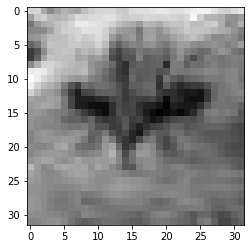

In [9]:
plt.imshow(catsdata[0], cmap='gray')

In [10]:
mydata = catsdata

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test = train_test_split(mydata, train_size=0.7, shuffle=True, random_state=42)

In [13]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [14]:
# rescaling images
# a, b = 0.0, 1.0 
# X_train = (X_train - a) / (b-a)
# X_test = (X_test - a) / (b-a)

In [15]:
np.shape(X_train), np.shape(X_test)

((11022, 32, 32), (4725, 32, 32))

# Model building and training

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, Dropout
from tensorflow.keras.optimizers import SGD

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import tensorflow as tf
import datetime, os

In [18]:
# logsd = 'logs/fitting'

# board = TensorBoard(log_dir=logsd,histogram_freq=1,
#     write_graph=True,
#     write_images=True,
#     update_freq='epoch',
#     profile_batch=2,
#     embeddings_freq=1)

In [19]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[32,32])) 
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(32))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 400)               410000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3232      
Total params: 513,532
Trainable params: 513,532
Non-trainable params: 0
_________________________________________________________________


In [21]:
32/(32*32)

0.03125

In [22]:
decoder = Sequential()
decoder.add(Dense(100,input_shape=[32],activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(32 * 32, activation="sigmoid"))
decoder.add(Reshape([32, 32]))

In [23]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_6 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              410624    
_________________________________________________________________
reshape (Reshape)            (None, 32, 32)            0         
Total params: 514,524
Trainable params: 514,524
Non-trainable params: 0
_________________________________________________________________


In [24]:
autoencoder = Sequential([encoder, decoder])

In [25]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32)                513532    
_________________________________________________________________
sequential_1 (Sequential)    (None, 32, 32)            514524    
Total params: 1,028,056
Trainable params: 1,028,056
Non-trainable params: 0
_________________________________________________________________


In [26]:
autoencoder.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [28]:
autoencoder.fit(X_train, X_train, epochs=100000, validation_data=[X_test, X_test], callbacks=[early_stop])

Train on 11022 samples, validate on 4725 samples
Epoch 1/100000
11022/11022 [==============================] - 2s 209us/sample - loss: 0.0281 - acc: 0.1155 - val_loss: 0.0195 - val_acc: 0.1410
Epoch 2/100000
11022/11022 [==============================] - 2s 197us/sample - loss: 0.0183 - acc: 0.1433 - val_loss: 0.0170 - val_acc: 0.1543
Epoch 3/100000
11022/11022 [==============================] - 2s 186us/sample - loss: 0.0154 - acc: 0.1606 - val_loss: 0.0148 - val_acc: 0.1659
Epoch 4/100000
11022/11022 [==============================] - 2s 187us/sample - loss: 0.0141 - acc: 0.1719 - val_loss: 0.0140 - val_acc: 0.1805
Epoch 5/100000
11022/11022 [==============================] - 2s 196us/sample - loss: 0.0132 - acc: 0.1808 - val_loss: 0.0129 - val_acc: 0.1847
Epoch 6/100000
11022/11022 [==============================] - 2s 191us/sample - loss: 0.0126 - acc: 0.1855 - val_loss: 0.0127 - val_acc: 0.1878
Epoch 7/100000
11022/11022 [==============================] - 2s 197us/sample - loss: 0

In [29]:
# %tensorboard --logdir logs

# Evaluating model

In [30]:
losses = pd.DataFrame(autoencoder.history.history)

In [31]:
losses.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

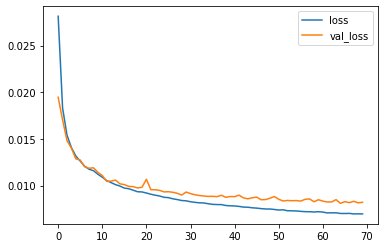

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
autoencoder.evaluate(X_test, X_test), autoencoder.metrics_names

4725/4725 [==============================] - 0s 51us/sample - loss: 0.0082 - acc: 0.2443


([0.00821110401184313, 0.24433202], ['loss', 'acc'])

In [71]:
passed_images = autoencoder.predict(X_test)

In [35]:
np.shape(passed_images)

(4725, 32, 32)

In [123]:
from random import randint

x = [randint(0, np.shape(passed_images)[0]) for p in range(0, 4)]

In [124]:
print(x)

[2680, 1667, 3926, 1129]


In [125]:
# x = [1270, 4621, 4490, 1683]

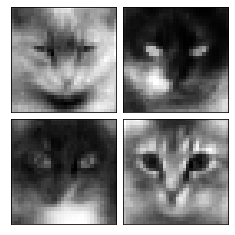

In [126]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = passed_images[x[0]]
im2 = passed_images[x[1]]
im3 = passed_images[x[2]]
im4 = passed_images[x[3]]

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

1683


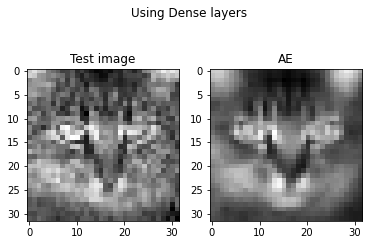

In [106]:
import random
n = random.randint(0, 4724)
print(n)

f = plt.figure()
f.add_subplot(1,2, 2)
plt.imshow(passed_images[n], cmap='gray')
plt.title('AE')

f.add_subplot(1,2, 1)
plt.imshow(X_test[n], cmap='gray')
plt.title('Test image')

plt.suptitle('Using Dense layers')
plt.show(block=True)


## Reconstruction metrics

In [37]:
def fnmse(yHat, y):
    return np.mean((yHat-y)**2)

def bCrossEntropy(yHat, y):
    return -np.mean(y*np.log(yHat) + (1-y)*np.log(1-yHat))

def cosinedist(yHat, y):
    
    u = yHat.flatten()
    v = y.flatten() 
    normu = np.sqrt(np.sum(u**2))
    normv = np.sqrt(np.sum(v**2)) 
    cosine_dist = np.dot(u, v) / (normu*normv)
    
    return 1 - cosine_dist

In [38]:
mse, bce, cd = 0, 0, 0
n_test = np.shape(X_test)[0]

for i in range(n_test):
    
    yHat, y = passed_images[i], X_test[i]
    
    mse += fnmse(yHat, y)
    bce += bCrossEntropy(yHat, y)
    cd += cosinedist(yHat, y)
    
print("Mean square error", mse/n_test)
print("Binary Crossentropy", bce/n_test)
print("Cosine distance", cd/n_test)

Mean square error 0.008211103929174198
Binary Crossentropy 0.5707577535797587
Cosine distance 0.0213702883980384


# UMAP embedding in 2d

In [39]:
latent_space = encoder.predict(X_test)

In [40]:
print(np.shape(latent_space))

(4725, 32)


(4725, 2)


Text(0.5, 1.0, 'Vanilla autoencoder; latent dim 32; lf mse')

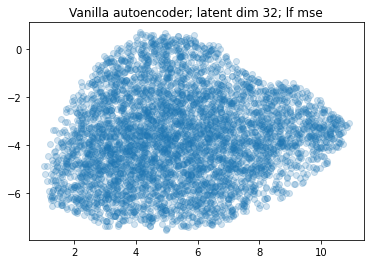

In [64]:
# !pip install umap-learn

import umap

# create the embedding of the latent space
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5).fit_transform(latent_space)
print(np.shape(embedding))

# plot the embedding
plt.scatter(embedding[:,0], embedding[:,1], alpha=0.2)
plt.title('Vanilla autoencoder; latent dim 32; lf mse')

# Sampling from latent space

In [42]:
m = np.transpose(latent_space)
print(np.shape(m), np.cov(m).shape)

(32, 4725) (32, 32)


In [43]:
np.mean(m, axis=1).shape

(32,)

In [44]:
samples = np.random.multivariate_normal(np.mean(m, axis=1), np.cov(m), size=100)
print(samples.shape)

(100, 32)


In [59]:
randomsamples = decoder.predict(samples)

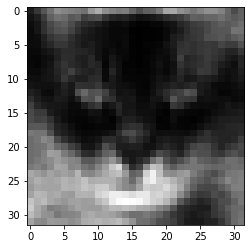

In [60]:
plt.imshow(randomsamples[1], cmap='gray')

In [61]:
print(np.shape(randomsamples))

(100, 32, 32)


# Saving random samples 

In [63]:
for i in range(np.shape(randomsamples)[0]):
    name = 'fairsamples_ae_ls32/' + str(i) + '.jpeg'
    plt.imsave(name, randomsamples[i], cmap='gray')

In [108]:
def plot_cat_wall(fake_imgs, cmap='Greys', epoch='real'):
    fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(2, 2))
    
    for i, ax in enumerate(axis.ravel()):
        ax.imshow(fake_imgs[i, :, :],
                  cmap=cmap, origin='upper', 
                  aspect='equal')
        
    for ax in axis.ravel():
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    fig.subplots_adjust(wspace=0, hspace=0)
#     fig.suptitle('Gen Cats Vanilla autoencoder latent space 2d', fontsize=20, y=.95)
#     plt.savefig('/home/lavanyanemani96/ae_ls2d.jpg')
    plt.show()